# Capítulo 8 - Ejercicios
## Mapas

### Ud puede elegir para los mapas la herramienta que prefiera.

Una base de datos con información de precipitación, temperatura y radiación en más de 2600 cuencas está disponible en la página del U.S. Geological Survey (sciencedatabase.gov, https://doi.org/10.5066/F7SJ1JVG). El archivo con la ubicación de cada estación se encuentra en el archivo  
- `BASIN_CHARACTERISTICS.csv`

El artículo de referencia es Kam, Jonghun, Milly, P.C.D., and Dunne, K.A., 2018, Monthly Time Series of Precipitation, Air Temperature, and Net Radiation for 2,673 Gaged River Basins Worldwide: U.S. Geological Survey data release, .

El archivo tiene la información de la ubicación de cada sitio. Lat/Lon/Elev y área de cada cuenca. 

Fuente de los datos: 
https://www.sciencebase.gov/catalog/item/5a58af4fe4b00b291cd6a5fb


## Primera parte

1. Genere un mapa con la ubicación de las estaciones o cuencas a nivel global. 
2. Escoja una (1) estación, márquela en el mapa anterior y haga un mapa con un zoom (por ejemplo 15 grados a cada lado) y ponga la topografía. Busque una buena forma de presentar el resultado. 


## Segunda parte

En algunos casos, es importante presentar uun conjunto de datos espaciales que tienen varios parámetros, por ejemmplo terremmotos que tienen magnitud y profundidad además de latitud y longitud. El archivo `eq_japan.csv` tiene los terremotos uubicados en la zona de Japón desde 2018 de acuerdo al catálogo del USGS (https://earthquake.usgs.gov/earthquakes/search/, último acceso Septiembre 2021). 

Haga un mapa de la zona e incluya la ubicación de los terremotos incluuyendo la información de magnitud y profundidad. Por ejemplo, Ud puede definir una escala de colores para profundidad, y usar la mmagnitud para definir el tamaño del símbolo. 


# Respuestas

## Cargar datos una sola vez

In [1]:
import numpy as np

# Nombres de archivos
sta_file = '../data/BASIN_CHARACTERISTICS.csv'


# Read station file
basin = np.loadtxt(sta_file,skiprows=1,delimiter=',')
sta  = basin[:,0]
lon  = basin[:,1]
lat  = basin[:,2]
area = basin[:,3]
elev = basin[:,4]

nsta = len(sta)

Station #  2444


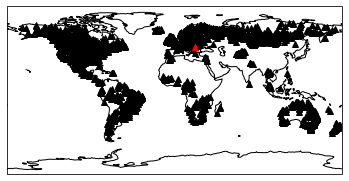

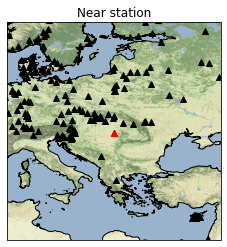

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as tiles

# Select station to plot 
ista = np.random.randint(nsta) # 801
print('Station # ', ista)

# Create map
fig = plt.figure()
ax  = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90])
ax.coastlines()
ax.plot(lon,lat,'k^')
ax.plot(lon[ista],lat[ista],'r^')

tiler = tiles.Stamen('terrain-background')

fig = plt.figure()
ax  = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent([lon[ista]-15, lon[ista]+15, lat[ista]-15, lat[ista]+15])
ax.set_title('Near station')
ax.add_image(tiler, 7)
ax.coastlines(color='black',resolution='10m')
ax.plot(lon,lat,'k^')
ax.plot(lon[ista],lat[ista],'r^')

plt.show()

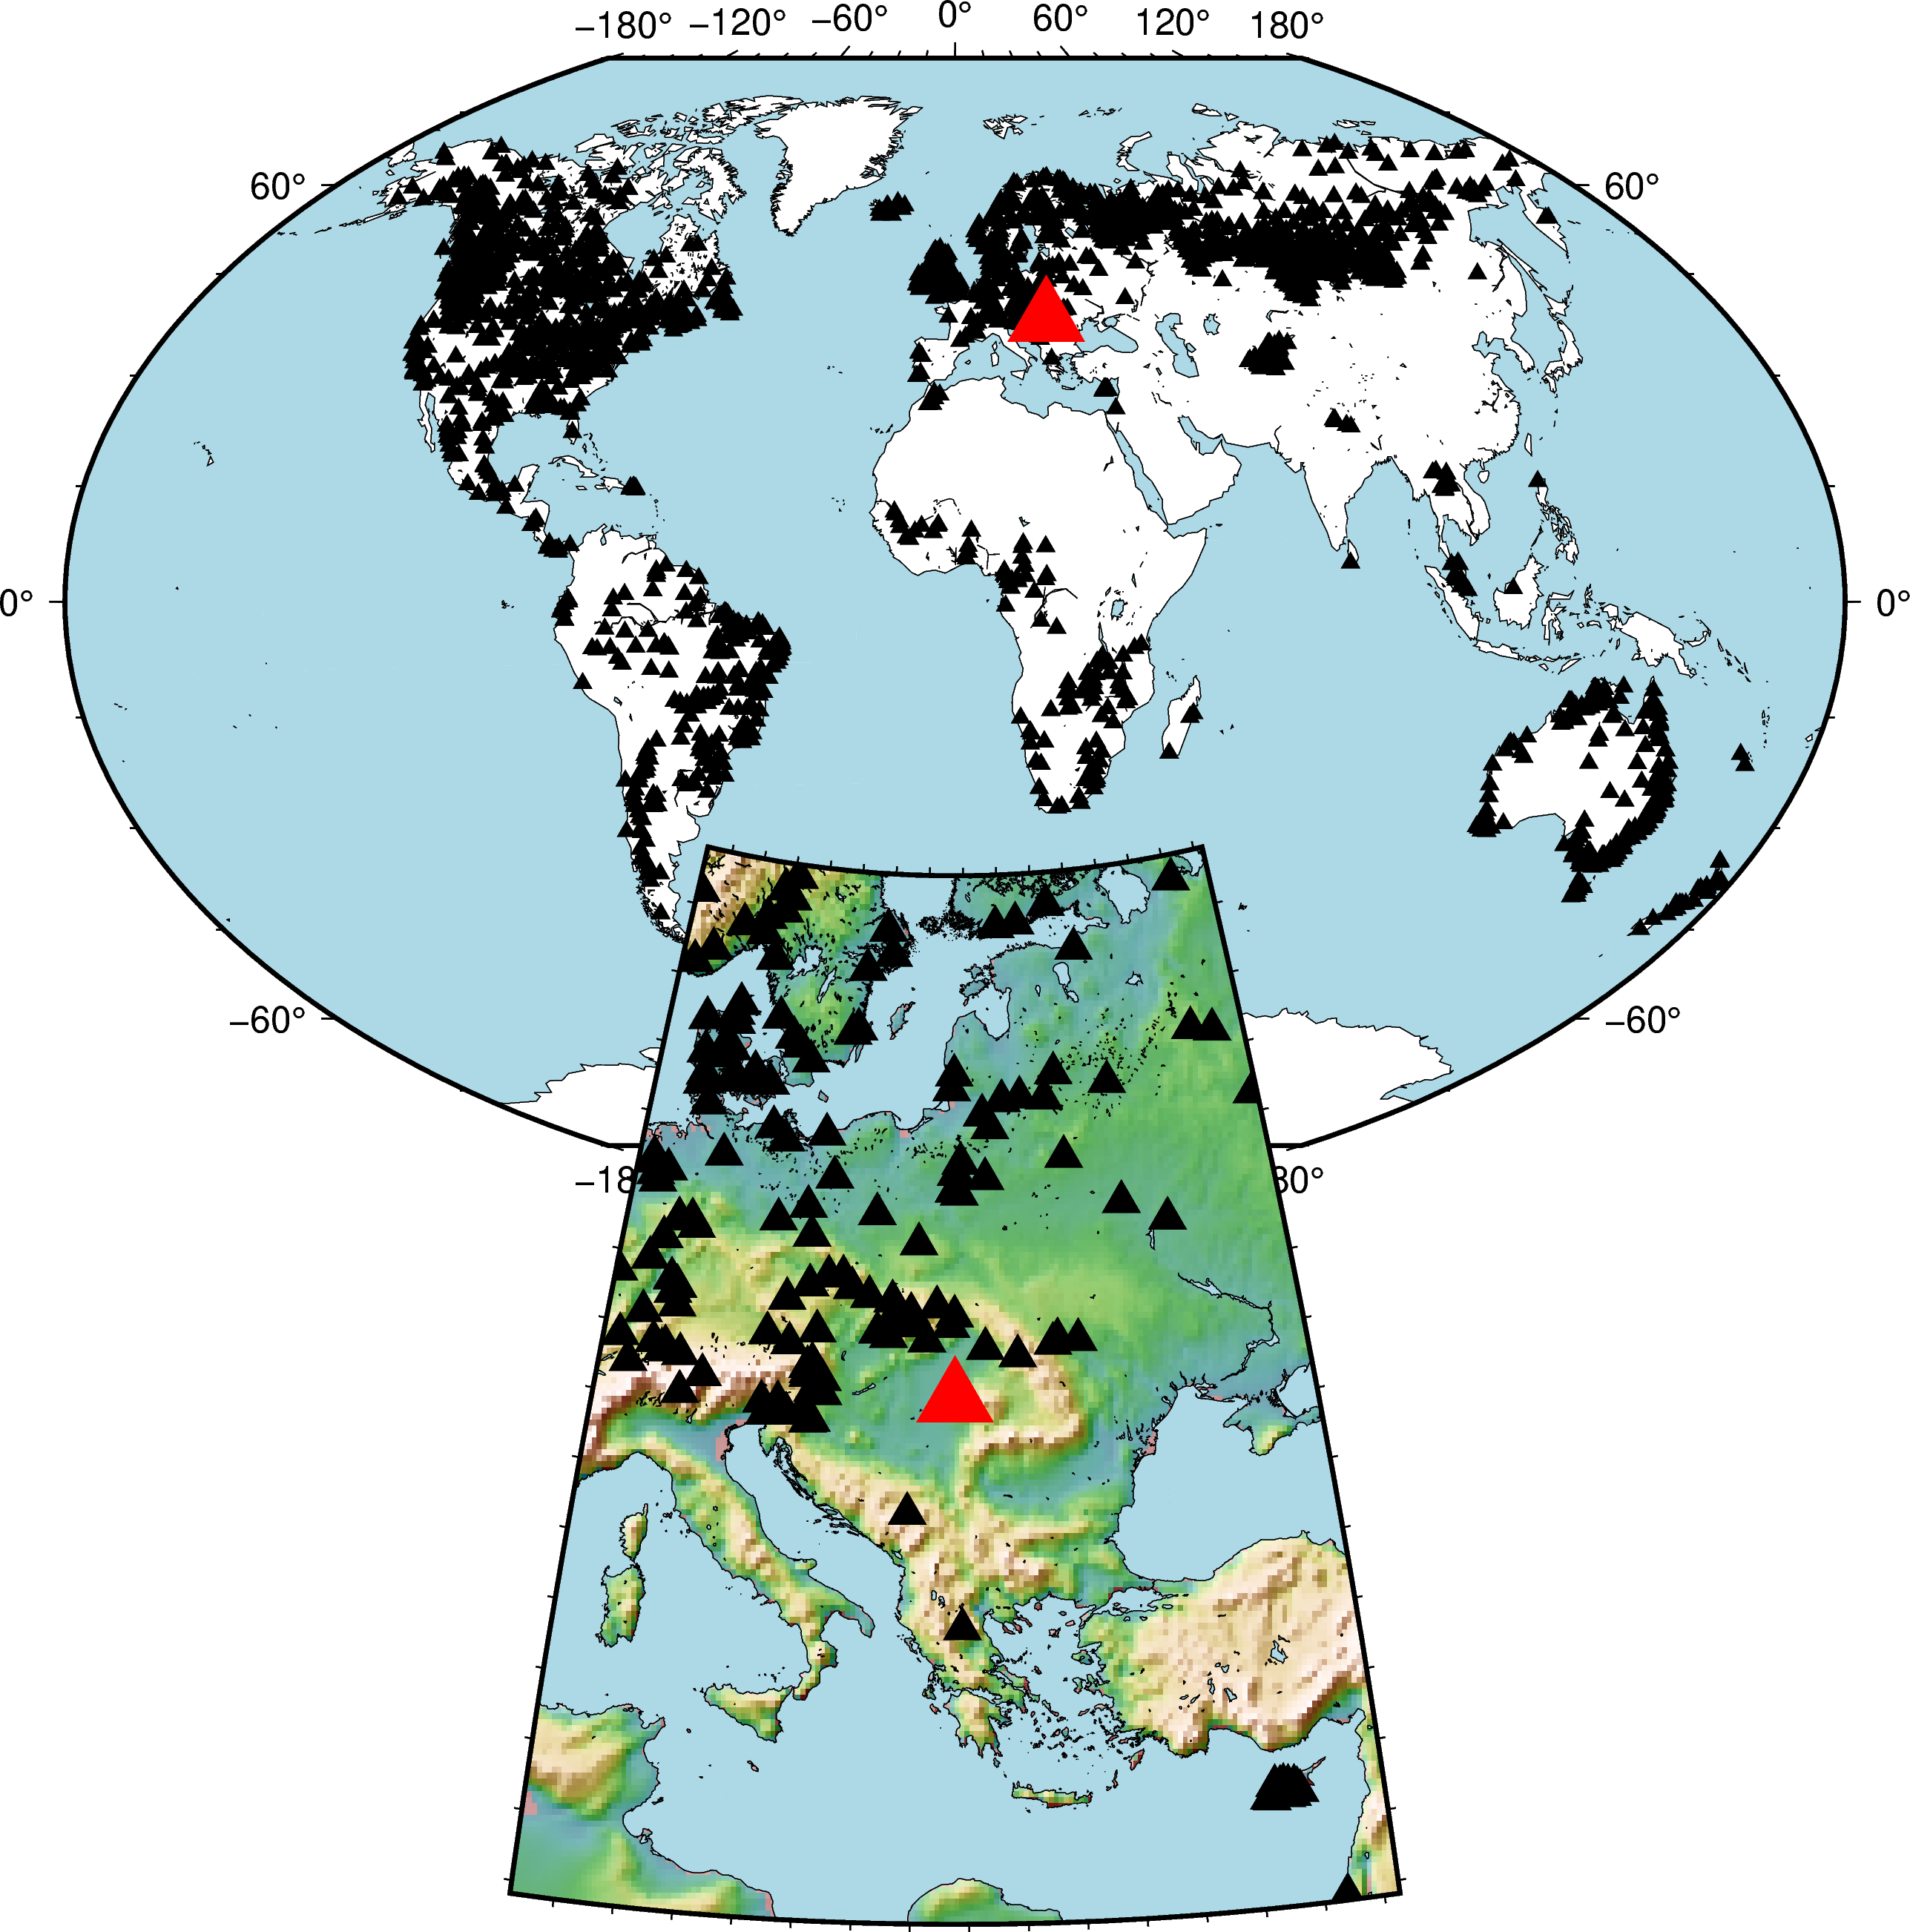

In [7]:
import pygmt
import numpy as np

reg = [lon[ista]-15, lon[ista]+15, lat[ista]-15, lat[ista]+15]

fig = pygmt.Figure()
fig.coast(
    region='g',
    projection='R0/8i',
    shorelines=True,
    water='lightblue',
    frame=True,
)


fig.plot(lon,lat,
    style='t0.1i',
    color='black',
        )
fig.plot(lon[ista],lat[ista],
    style='t0.4i',
    color='red',
        )

fig.shift_origin(xshift='2.i',yshift='-3.5i')  # Shift for next call


# Cassini Cylindrical projection
fig.grdimage(
    '@earth_relief_10m',
    region=reg,
    projection='C4i',
    cmap='topo',
    shading=True,
)
fig.coast(
    region=reg,
    projection='C4i',
    shorelines=True,
    water='lightblue',
    frame='f'
)

fig.plot(lon,lat,
    style='t0.2i',
    color='black',
        )
fig.plot(lon[ista],lat[ista],
    style='t0.4i',
    color='red',
        )

fig.savefig('basins.pdf')
fig.show()

# Punto 2

In [8]:
import numpy as np

# Nombres de archivos
eq_file = '../data/eq_japan.csv'


# Read station file
eq = np.loadtxt(eq_file,skiprows=1,delimiter=',',
                  usecols=[1,2,3,4])

lat  = eq[:,0]
lon  = eq[:,1]
dep  = eq[:,2]
mag  = eq[:,3]
neq  = len(lat)

print(0.02*(2**mag))

[0.59714111 0.36758347 0.42224253 ... 0.32       0.45254834 0.39396621]


21.5 54.5 119.5 159.5


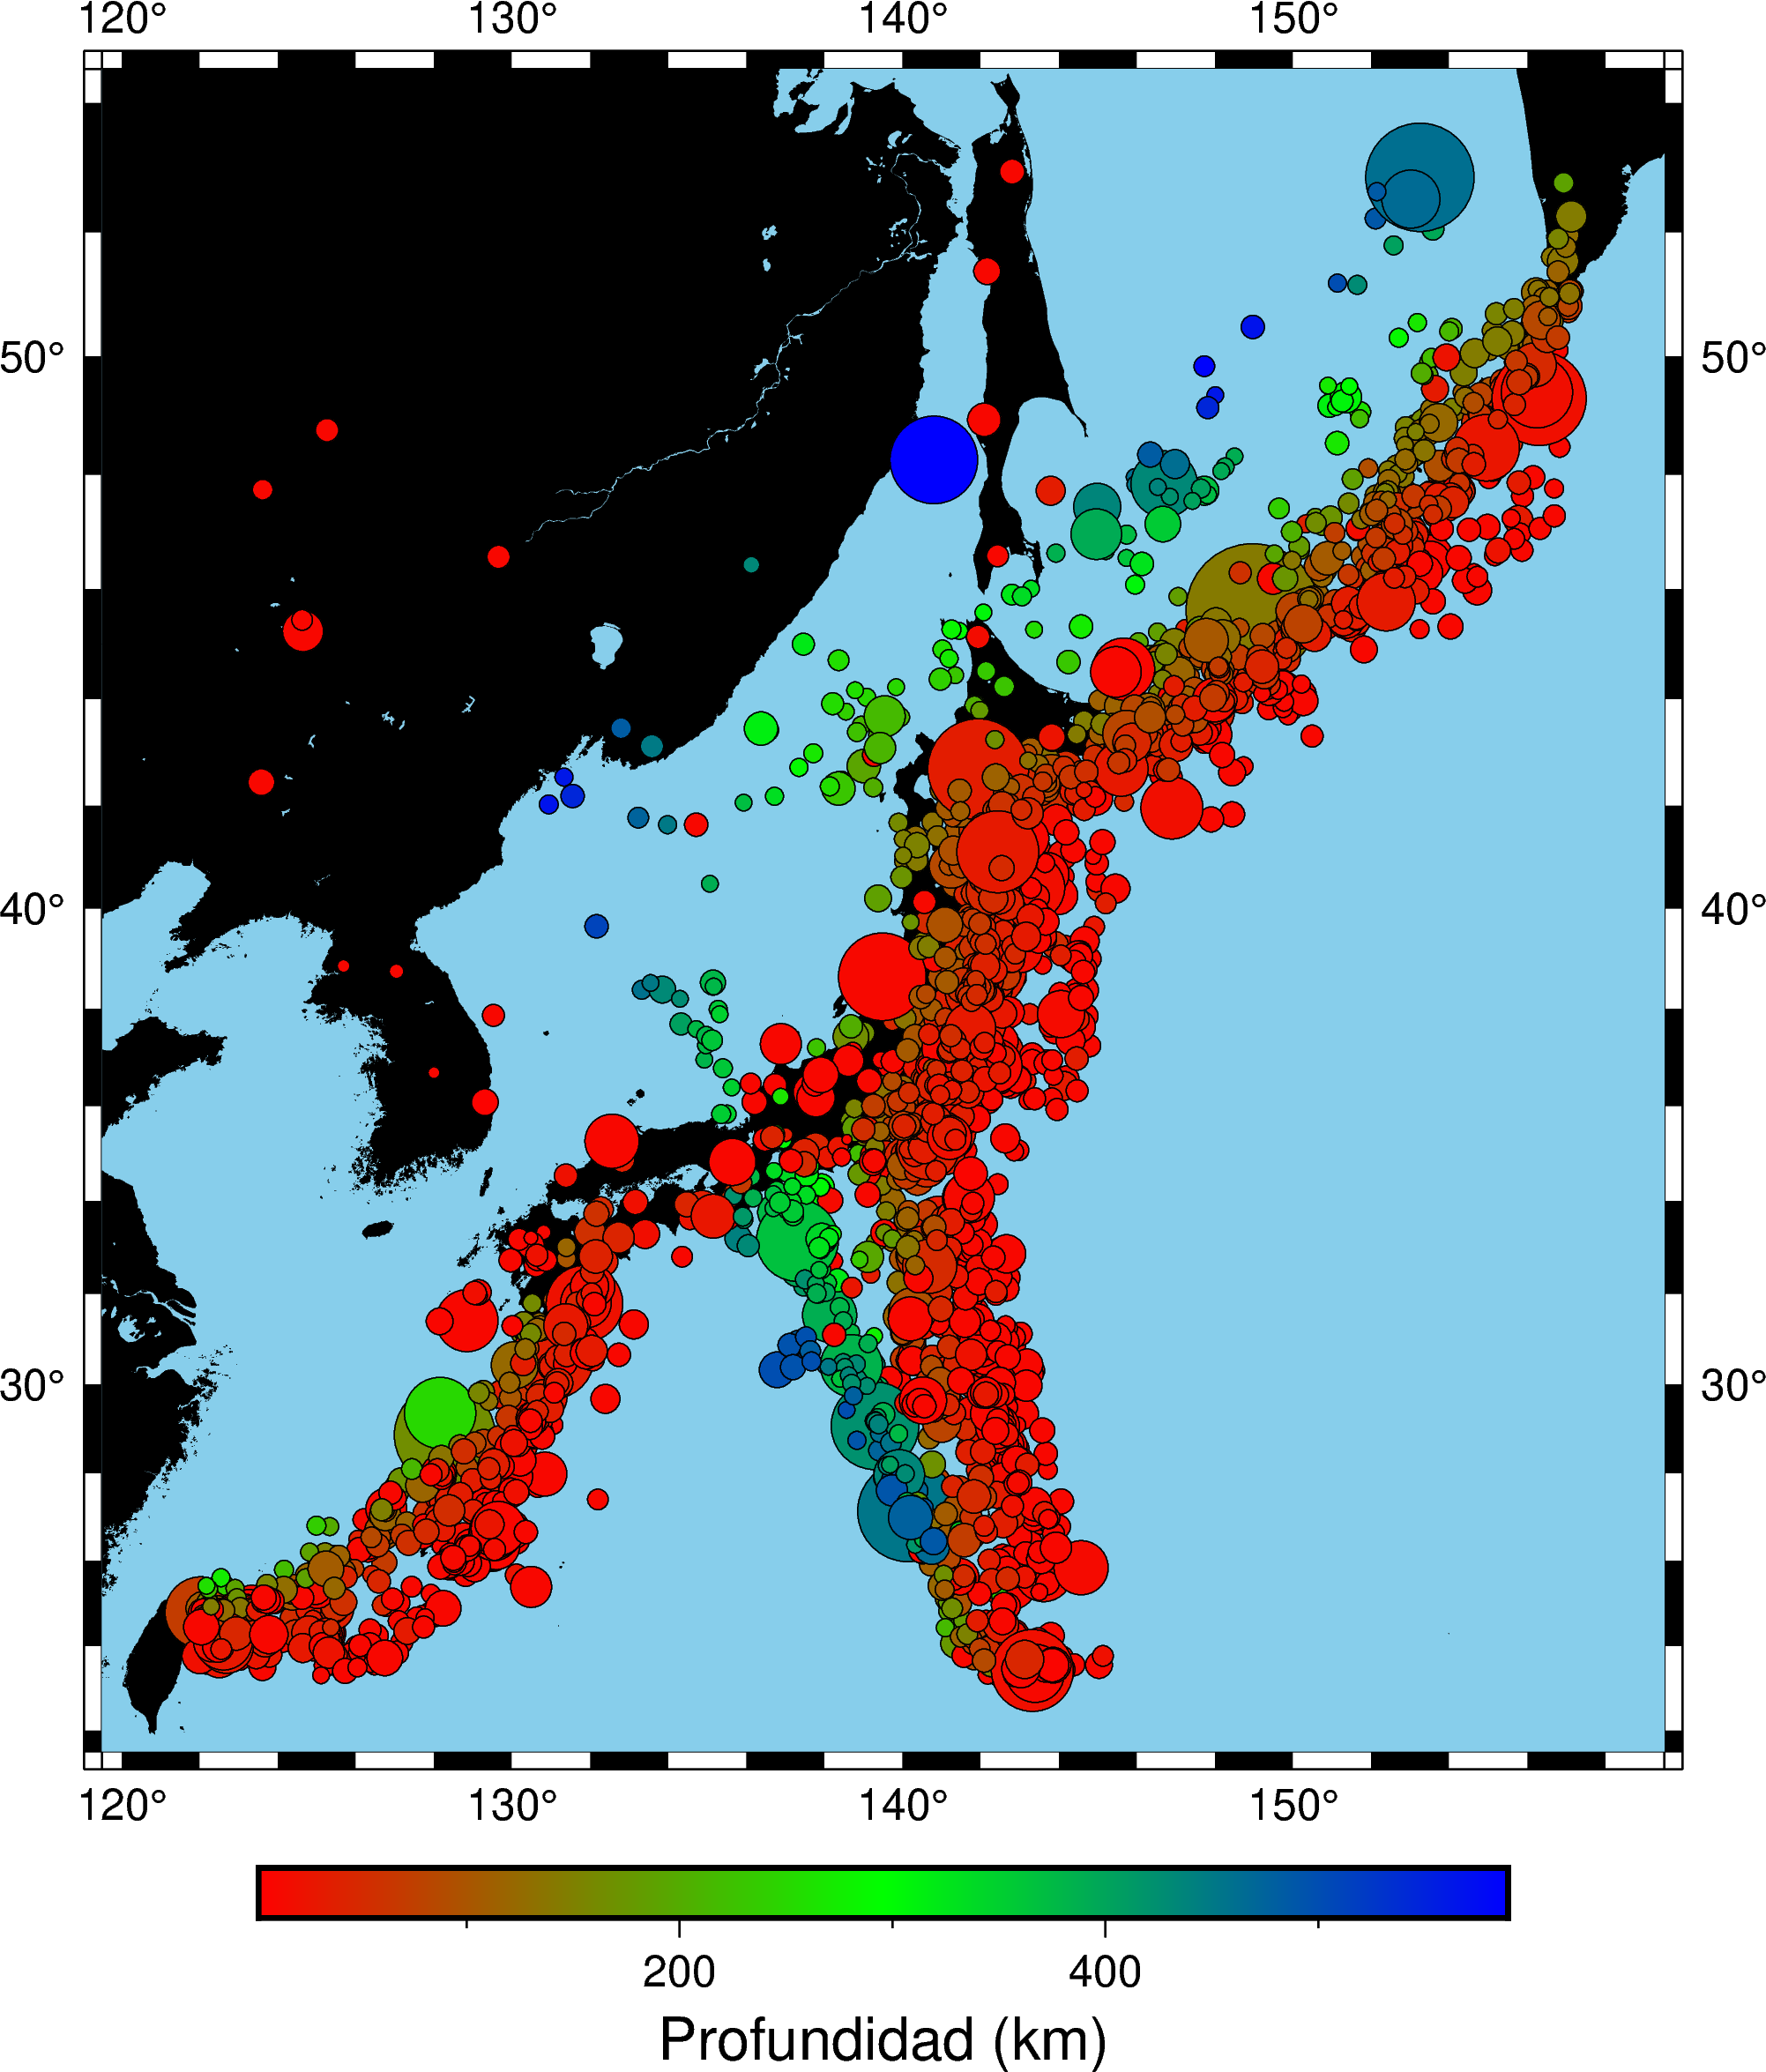

In [60]:
lat0 = np.floor(np.min(lat))-1.0
lon0 = np.floor(np.min(lon))-1.0
lat1 = np.ceil(np.max(lat))+1.0
lon1 = np.ceil(np.max(lon))+1.0

reg = [lon0, lon1, lat0, lat1]

fig = pygmt.Figure()
pygmt.makecpt(cmap="red,green,blue", 
              series=[dep.min(), dep.max()])

fig.basemap(region=reg,
            projection="M15c",
            frame=True)
fig.coast(
    land="black", 
    water="skyblue")

fig.plot(
    x=lon,
    y=lat,
    sizes =0.01 * (2 ** mag),
    style="cc",
#    color="white",
    color = dep,
    cmap = True,
    pen="black",
)
fig.colorbar(frame='af+l"Profundidad (km)"')
fig.savefig('eq_japan.pdf')
fig.show()